In [71]:
# https://datahack.analyticsvidhya.com/contest/india-ml-hiring-hackathon-2019/#solution_checker
import pandas as pd
import matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from xgboost import plot_tree

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

In [72]:
from imblearn.over_sampling import SMOTE

In [74]:
test_file = "/Users/raghugup/Downloads/analytics_vidya/test.csv"
train_file = "/Users/raghugup/Downloads/analytics_vidya/train.csv"

In [75]:
#reading file from Pandas
X_train = pd.read_csv(train_file)
X_test_original = pd.read_csv(test_file)

In [76]:
#describing training dataset
X_train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [77]:
X_test = X_test_original
X_test.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,...,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000
mean,17933.500000,3.872850,207764.846930,293.130123,67.388334,1.596805,30.762867,769.926504,2.729409,462.436681,...,0.001952,0.002007,0.002705,0.002370,0.003374,0.003680,0.004322,0.005548,0.006162,0.007333
std,10353.766714,0.460537,114561.745828,89.298799,17.246741,0.490546,9.726146,41.779664,8.029155,381.314899,...,0.056838,0.059238,0.071770,0.066958,0.086539,0.092898,0.099676,0.121322,0.141455,0.160602
min,1.000000,2.375000,15000.000000,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8967.250000,3.500000,119000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17933.500000,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,742.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26899.750000,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35866.000000,6.625000,802000.000000,360.000000,97.000000,2.000000,55.000000,839.000000,35.000000,832.000000,...,5.000000,5.000000,6.000000,6.000000,7.000000,5.000000,6.000000,7.000000,8.000000,9.000000


In [78]:
X_train.shape

(116058, 29)

In [79]:
X_test.shape

(35866, 28)

In [80]:
#Printing columns
X_train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [81]:
X_test.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'],
      dtype='object')

In [82]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['source',
 'financial_institution',
 'origination_date',
 'first_payment_date',
 'loan_purpose']

In [83]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
cols_with_missing

[]

In [84]:
#seperating target variable
y = X_train['m13']
X_train = X_train.drop(columns = ['m13'])

In [85]:
#Correlation with Y
X_train.drop(columns = object_cols).apply(lambda x: x.corr(y))

loan_id                    -0.002982
interest_rate               0.054298
unpaid_principal_bal       -0.017120
loan_term                   0.023502
loan_to_value               0.016357
number_of_borrowers        -0.039979
debt_to_income_ratio        0.038033
borrower_credit_score      -0.094215
insurance_percent           0.005722
co-borrower_credit_score   -0.042651
insurance_type              0.005999
m1                          0.092054
m2                          0.146921
m3                          0.157394
m4                          0.218956
m5                          0.259529
m6                          0.287712
m7                          0.309072
m8                          0.339362
m9                          0.369138
m10                         0.367840
m11                         0.410213
m12                         0.466442
dtype: float64

In [16]:
# Drop Categorical Variables
# drop_X_train = train_X.select_dtypes(exclude=['object'])
# drop_X_valid = valid_X.select_dtypes(exclude=['object'])

In [86]:
X_train = X_train.drop(columns = ['loan_id', 'origination_date', 'first_payment_date'] , errors = 'ignore')
X_test = X_test.drop(columns = ['loan_id', 'origination_date', 'first_payment_date'], errors = 'ignore')

In [87]:
#Remaining columns
len(X_train.columns)

25

In [88]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_test[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['source', 'financial_institution', 'loan_purpose']

Categorical columns that will be dropped from the dataset: []


In [89]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('source', 3), ('loan_purpose', 3), ('financial_institution', 19)]

In [90]:
# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_test[col])]
good_label_cols

['source', 'financial_institution', 'loan_purpose']

In [91]:
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
bad_label_cols

[]

In [92]:
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['source', 'financial_institution', 'loan_purpose']

Categorical columns that will be dropped from the dataset: []


In [93]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 20]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['source', 'financial_institution', 'loan_purpose']

Categorical columns that will be dropped from the dataset: []


In [94]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [95]:
len(OH_X_train.columns)

47

In [107]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 5)]

In [98]:
n_estimators

[100, 144, 188, 233, 277, 322, 366, 411, 455, 500]

In [108]:
max_depth

[3, 4, 6, 8, 10]

In [109]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1],
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.5, 0.8, 1.0],
        'max_depth': max_depth,
        'eta': [0.01, 0.05, 0.1, 0.2],
        'n_estimators' : n_estimators,
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
        }

In [110]:
xgb = XGBClassifier(objective='binary:logistic',
                    silent=True, n_jobs=1)

In [102]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [103]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=1, cv=skf.split(OH_X_train,y), verbose=3, random_state=1001 )
random_search.fit(OH_X_train, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=0.8, n_estimators=366, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=366, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=1.0, score=0.385, total= 2.2min
[CV] subsample=0.8, n_estimators=366, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV]  subsample=0.8, n_estimators=366, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=1.0, score=0.509, total= 2.2min
[CV] subsample=0.8, n_estimators=366, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV]  subsample=0.8, n_estimators=366, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=1.0, score=0.485, total= 2.2min
[CV] subsample=0.8, n_estimators=455, min_child_weight=10, max_depth=16, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=455, min_child_weight=10, max_depth=16, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=0.8, score=0.435, total= 1.7min
[CV] subsample=0.8, n_estimators=455, min_child_weight=10, max_depth=16, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=455, min_child_weight=10, max_depth=16, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=0.8, score=0.498, total= 1.7min
[CV] subsample=0.8, n_estimators=455, min_child_weight=10, max_depth=16, learning_rate=0.3, gamma=0.5, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=455, min_child_weight=10, max_depth=16, learning_rate=0.3, gamma=0.5, eta=0.2, 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 36.7min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x140297d50>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'gamma': [0.5, 1, 1.5, 2],
                             

In [104]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best Score')
print(random_search.best_score_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.head(5)


 All results:
{'mean_fit_time': array([131.82351391, 101.02829369, 178.24748635, 160.30179071,
       159.82360872]), 'std_fit_time': array([ 1.93117671,  2.26889298, 27.19138123,  8.02626114,  3.20540832]), 'mean_score_time': array([0.59533493, 0.99238737, 0.23393369, 1.07388345, 0.46142856]), 'std_score_time': array([0.02901972, 0.02699426, 0.02837142, 0.18008095, 0.04935338]), 'param_subsample': masked_array(data=[0.8, 0.8, 1.0, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[366, 455, 322, 500, 455],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[12, 16, 16, 12, 12],
             mask=[False, False, False, False, Fa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,131.823514,1.931177,0.595335,0.029020,0.8,366,1,12,0.3,0.5,0.2,1,"{'subsample': 0.8, 'n_estimators': 366, 'min_c...",0.384615,0.508982,0.484663,0.459420,0.053819,5
1,101.028294,2.268893,0.992387,0.026994,0.8,455,10,16,0.3,0.5,0.2,0.8,"{'subsample': 0.8, 'n_estimators': 455, 'min_c...",0.434783,0.498498,0.492401,0.475227,0.028707,3
2,178.247486,27.191381,0.233934,0.028371,1,322,1,16,0.3,2,0.1,1,"{'subsample': 1.0, 'n_estimators': 322, 'min_c...",0.427119,0.504505,0.490566,0.474063,0.033679,4
3,160.301791,8.026261,1.073883,0.180081,0.8,500,5,12,0.01,0.5,0.05,1,"{'subsample': 0.8, 'n_estimators': 500, 'min_c...",0.444444,0.523077,0.534161,0.500561,0.039938,1
4,159.823609,3.205408,0.461429,0.049353,1,455,1,12,0.3,2,0.05,0.8,"{'subsample': 1.0, 'n_estimators': 455, 'min_c...",0.448161,0.495522,0.507837,0.483840,0.025725,2


In [143]:
results.sort_values('mean_test_score', ascending = False, inplace = True)
results.reset_index(inplace = True)

In [147]:
print('The best validation score was {:.5f}'.format(results.loc[0, 'mean_test_score']))
print('\nThe best hyperparameters were:')
pprint.pprint(results.loc[0, 'params'])

The best validation score was 0.50484

The best hyperparameters were:
{'colsample_bytree': 1.0,
 'eta': 0.05,
 'gamma': 5,
 'learning_rate': 0.001,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 247,
 'subsample': 0.8}


In [148]:
y_test = random_search.predict_proba(OH_X_test)
results_df = pd.DataFrame(data={'id':X_test_original['loan_id'], 'target':y_test[:,1]})
print(results_df.shape)
results_df.to_csv('/Users/raghugup/Downloads/submission_format-111.csv', index=False)

(35866, 2)


In [152]:
# Get the best parameters
random_search_params = results.loc[0, 'params']
xgb_best = XGBClassifier(**random_search_params, objective='binary:logistic',
                    silent=True, n_jobs=5)
xgb_best.fit(OH_X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, eta=0.05, gamma=5,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=247, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8, verbosity=1)

[0.01360688 0.01380417 0.01311119 0.01502299 0.         0.01871445
 0.02119816 0.01778051 0.         0.         0.         0.0126908
 0.01756601 0.01533075 0.02670962 0.01986451 0.05252517 0.01614158
 0.07765953 0.6114363  0.01253033 0.00955264 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01475447]
[('interest_rate', 0.013606875), ('unpaid_principal_bal', 0.013804166), ('loan_term', 0.013111191), ('loan_to_value', 0.0150229875), ('number_of_borrowers', 0.0), ('debt_to_income_ratio', 0.018714454), ('borrower_credit_score', 0.021198157), ('co-borrower_credit_score', 0.017780513), ('m1', 0.0), ('m2', 0.0), ('m3', 0.0), ('m4', 0.0126907965), ('m5', 0.017566014), ('m6', 0.0153307505), ('m7', 0.02670962), ('m8', 0.019864514), ('m9', 0.05252517), ('m10', 0.016141577), ('m11', 0.07765953), ('m12', 0.6114363), (0, 0.012530327)

Text(0.5, 0, 'relative importance')

<Figure size 432x288 with 0 Axes>

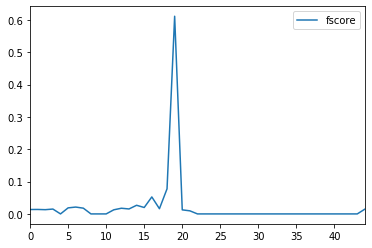

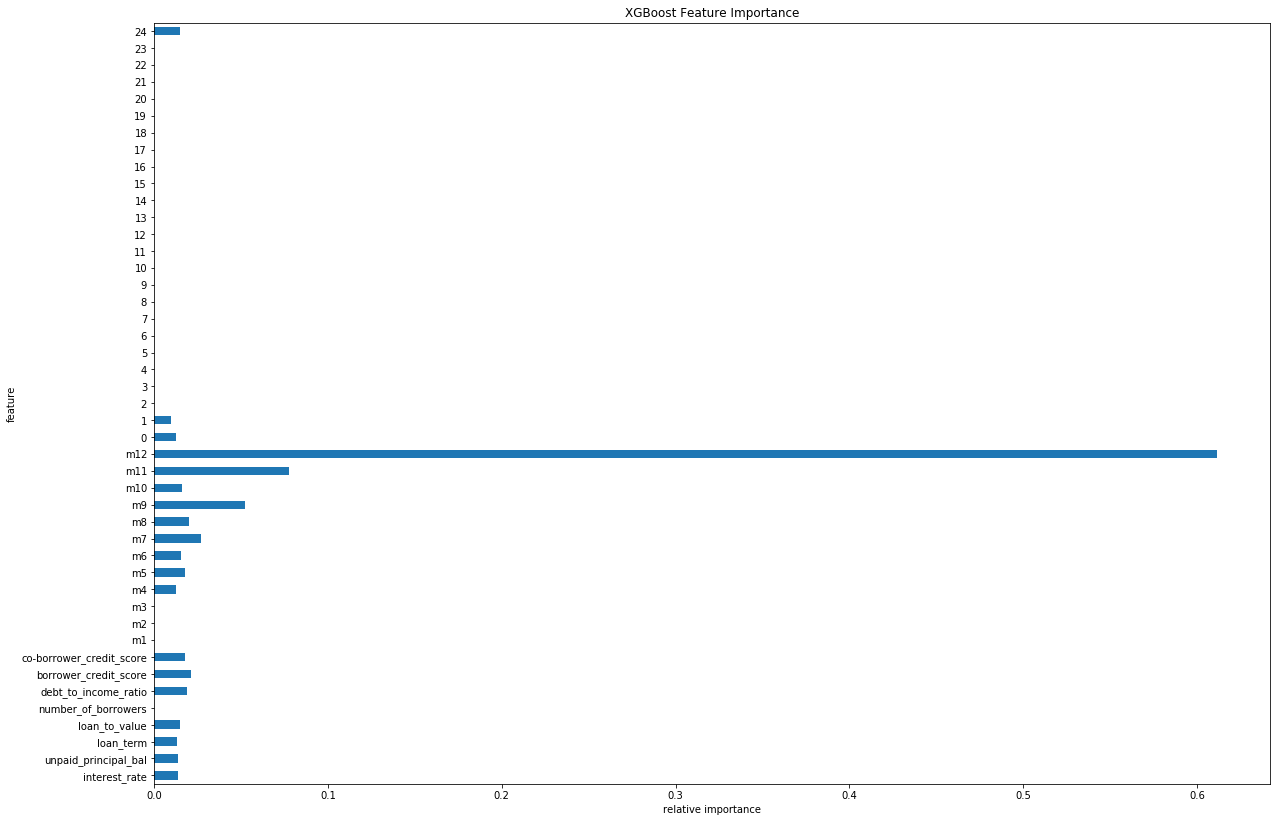

In [189]:
# feature importance
print(xgb_best.feature_importances_)
featureTuples = []
i = 0
for col in OH_X_train.columns:
    featureTuples.append((col, xgb_best.feature_importances_[i]))
    i = i + 1
print(featureTuples)
df = pd.DataFrame(featureTuples, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(20, 14))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

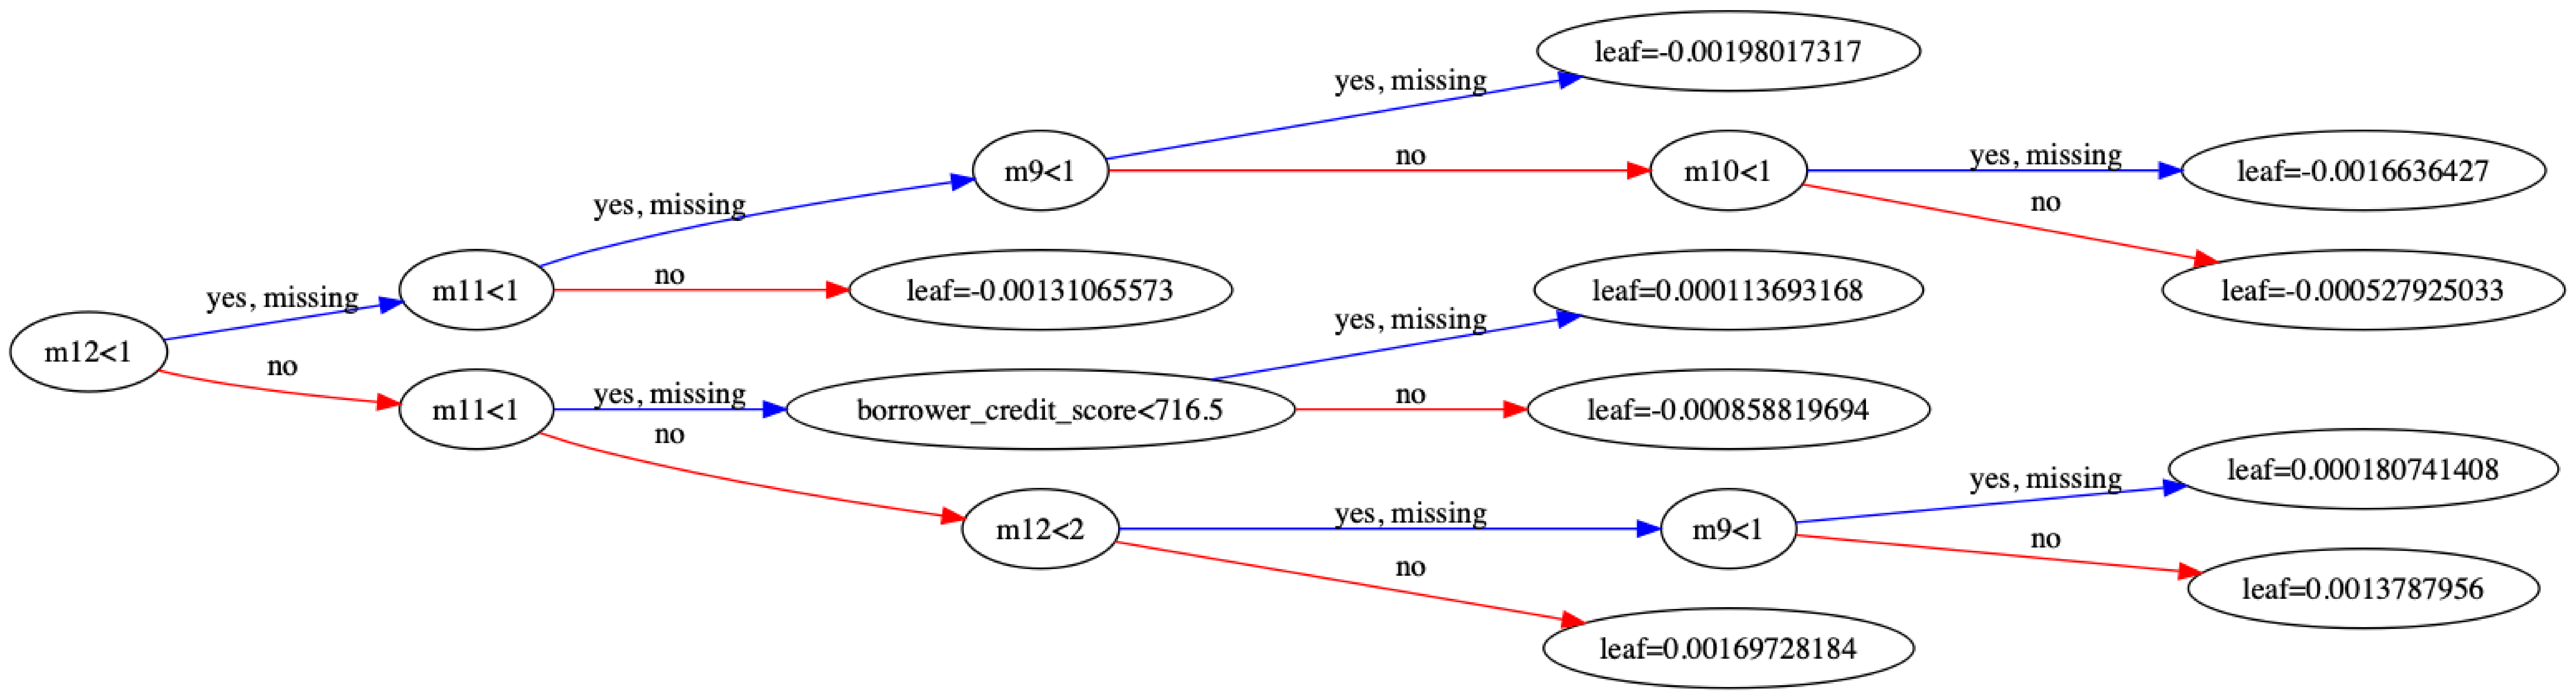

In [203]:
#print 5th boosted tree
plot_tree(xgb_best, num_trees= 5, rankdir='LR')
# plt.savefig("/Users/raghugup/Downloads/xgb_best.png", format='png', dpi=2000)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('/Users/raghugup/Downloads/tree.png')

0    115422
1       636
Name: m13, dtype: int64

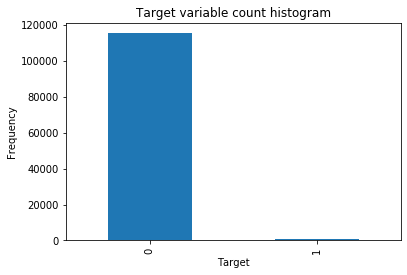

In [174]:
pd.value_counts(y).plot.bar()
plt.title('Target variable count histogram')
plt.xlabel('Target')
plt.ylabel('Frequency')
y.value_counts()

In [111]:
sm = SMOTE(random_state=2)
X_SMOTE, y_SMOTE = sm.fit_sample(OH_X_train, y)

Text(0, 0.5, 'Frequency')

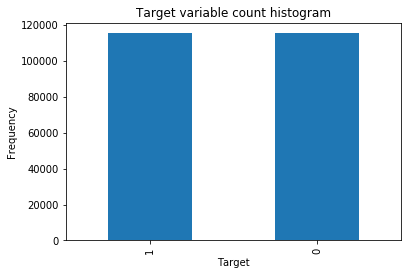

In [112]:
pd.value_counts(y_SMOTE).plot.bar()
plt.title('Target variable count histogram')
plt.xlabel('Target')
plt.ylabel('Frequency')

In [113]:
X_SMOTE.shape

(230844, 47)

In [115]:
param_comb = 5
random_search_smote = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=1, cv=3, verbose=5, random_state=1001 )
random_search_smote.fit(X_SMOTE, y_SMOTE)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8, score=0.994, total= 1.3min
[CV] subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8, score=0.999, total= 1.1min
[CV] subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=144, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=1, eta=0.1, colsample_bytree=0.8, score=1.000, total= 1.3min
[CV] subsample=1.0, n_estimators=322, min_child_weight=1, max_depth=10, learning_rate=0.01, gamma=0.5, eta=0.01, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.7min remaining:    0.0s


[CV]  subsample=1.0, n_estimators=322, min_child_weight=1, max_depth=10, learning_rate=0.01, gamma=0.5, eta=0.01, colsample_bytree=1.0, score=0.993, total= 5.4min
[CV] subsample=1.0, n_estimators=322, min_child_weight=1, max_depth=10, learning_rate=0.01, gamma=0.5, eta=0.01, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  9.2min remaining:    0.0s


[CV]  subsample=1.0, n_estimators=322, min_child_weight=1, max_depth=10, learning_rate=0.01, gamma=0.5, eta=0.01, colsample_bytree=1.0, score=0.998, total= 4.8min
[CV] subsample=1.0, n_estimators=322, min_child_weight=1, max_depth=10, learning_rate=0.01, gamma=0.5, eta=0.01, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=322, min_child_weight=1, max_depth=10, learning_rate=0.01, gamma=0.5, eta=0.01, colsample_bytree=1.0, score=0.997, total= 4.9min
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=1.5, eta=0.05, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=1.5, eta=0.05, colsample_bytree=0.8, score=0.993, total=  30.7s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=1.5, eta=0.05, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=1.5, eta=0.05, 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 30.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1.0],
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'gamma': [0.5, 1, 1.5, 2],
       

In [116]:
print('\n All results:')
print(random_search_smote.cv_results_)
print('\n Best Score')
print(random_search_smote.best_score_)
print('\n Best estimator:')
print(random_search_smote.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_smote.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search_smote.best_params_)
results_smote = pd.DataFrame(random_search_smote.cv_results_)
results_smote.head(5)


 All results:
{'mean_fit_time': array([ 74.29819099, 301.81966567,  30.32409795,  96.51782091,
       100.19908611]), 'std_fit_time': array([ 5.89270427, 16.45067577,  0.13706029,  2.59033567,  1.24498862]), 'mean_score_time': array([0.60942833, 1.70109026, 0.27850755, 0.43401106, 1.3295416 ]), 'std_score_time': array([0.01556421, 0.0214262 , 0.02161638, 0.0196085 , 0.10544201]), 'param_subsample': masked_array(data=[0.5, 1.0, 0.8, 1.0, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[144, 322, 100, 366, 322],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 1, 1, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 10, 3, 3, 6],
             mask=[False, False, False, False, False],

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,74.298191,5.892704,0.609428,0.015564,0.5,144,1,6,0.1,1,0.1,0.8,"{'subsample': 0.5, 'n_estimators': 144, 'min_c...",0.994224,0.999351,0.999623,0.997733,0.002483,1
1,301.819666,16.450676,1.701090,0.021426,1,322,1,10,0.01,0.5,0.01,1,"{'subsample': 1.0, 'n_estimators': 322, 'min_c...",0.992744,0.997594,0.997463,0.995934,0.002256,5
2,30.324098,0.137060,0.278508,0.021616,0.8,100,1,3,0.2,1.5,0.05,0.8,"{'subsample': 0.8, 'n_estimators': 100, 'min_c...",0.993358,0.998297,0.998635,0.996763,0.002412,4
3,96.517821,2.590336,0.434011,0.019609,1,366,1,3,0.3,2,0.1,0.8,"{'subsample': 1.0, 'n_estimators': 366, 'min_c...",0.993197,0.999273,0.999441,0.997304,0.002905,3
4,100.199086,1.244989,1.329542,0.105442,1,322,1,6,0.1,0.5,0.01,0.5,"{'subsample': 1.0, 'n_estimators': 322, 'min_c...",0.993434,0.999351,0.999467,0.997417,0.002817,2


In [118]:
# Get the best parameters
random_search_params_smote = results_smote.loc[0, 'params']
xgb_best_smote = XGBClassifier(**random_search_params_smote, objective='binary:logistic',
                    silent=True, n_jobs=5)
xgb_best_smote.fit(X_SMOTE, y_SMOTE)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=144, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.5, verbosity=1)

[5.4952884e-03 1.5899747e-03 5.3121126e-03 1.6166407e-03 7.2653614e-02
 1.3566888e-03 3.3146814e-02 4.9674115e-03 1.7369824e-02 7.3413929e-04
 3.5618108e-03 3.5240634e-03 5.3828591e-03 7.2777355e-03 4.9081384e-03
 2.9258204e-03 6.8610832e-03 2.2241743e-02 1.3730909e-02 9.6834160e-02
 3.9377782e-02 3.7102574e-01 3.8900640e-02 6.3167892e-02 5.4802569e-03
 3.3530043e-04 2.9761618e-02 0.0000000e+00 1.6344056e-03 1.2237776e-02
 3.7248975e-03 5.9541047e-04 6.6224026e-04 2.3013437e-02 9.2343212e-04
 0.0000000e+00 1.9624780e-03 1.4335354e-03 0.0000000e+00 2.9893073e-03
 9.3264012e-03 9.3031325e-04 2.1401886e-03 4.8797629e-03 3.0397240e-02
 2.7876483e-02 1.5732720e-02]
[('interest_rate', 0.0054952884), ('unpaid_principal_bal', 0.0015899747), ('loan_term', 0.0053121126), ('loan_to_value', 0.0016166407), ('number_of_borrowers', 0.072653614), ('debt_to_income_ratio', 0.0013566888), ('borrower_credit_score', 0.033146814), ('insurance_percent', 0.0049674115), ('co-borrower_credit_score', 0.017369824

Text(0.5, 0, 'relative importance')

<Figure size 432x288 with 0 Axes>

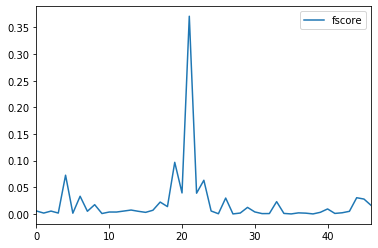

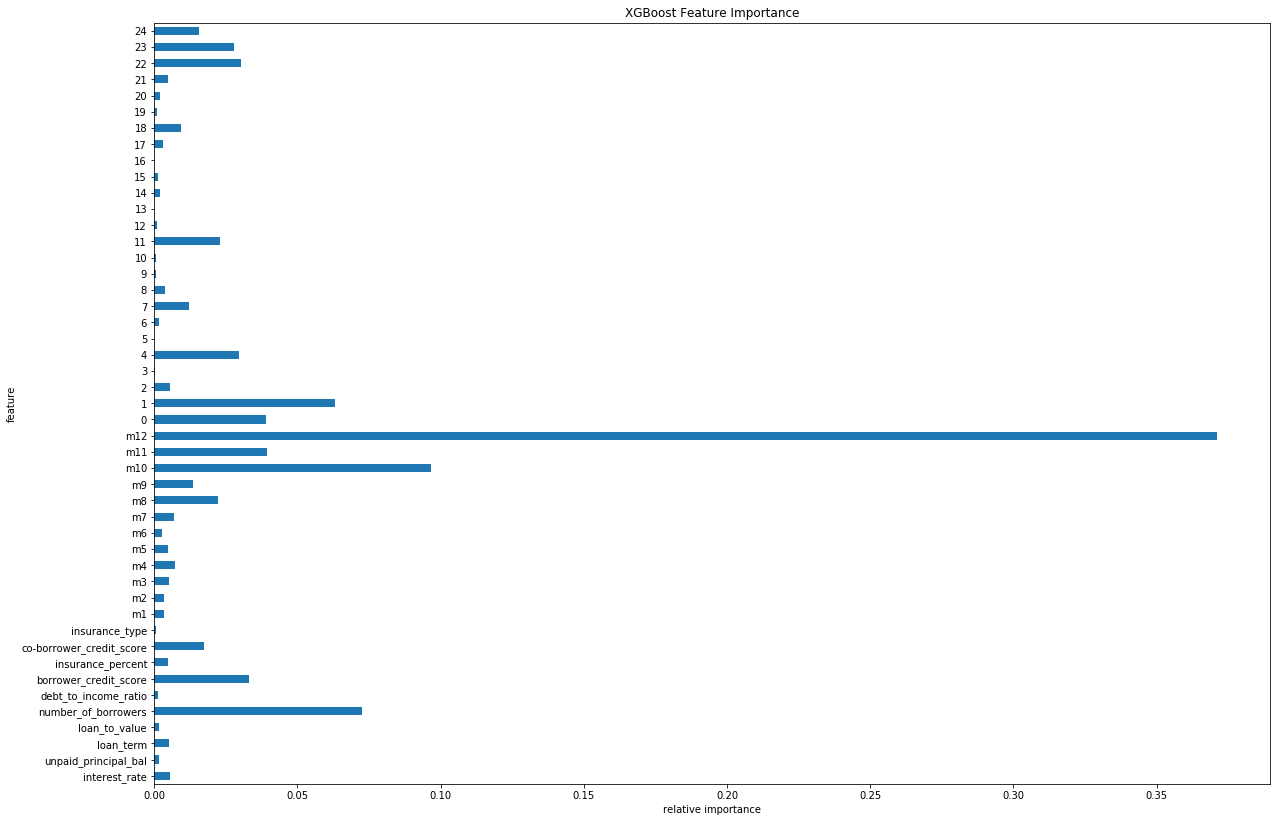

In [119]:
# feature importance
print(xgb_best_smote.feature_importances_)
featureTuples = []
i = 0
for col in OH_X_train.columns:
    featureTuples.append((col, xgb_best_smote.feature_importances_[i]))
    i = i + 1
print(featureTuples)
df = pd.DataFrame(featureTuples, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(20, 14))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

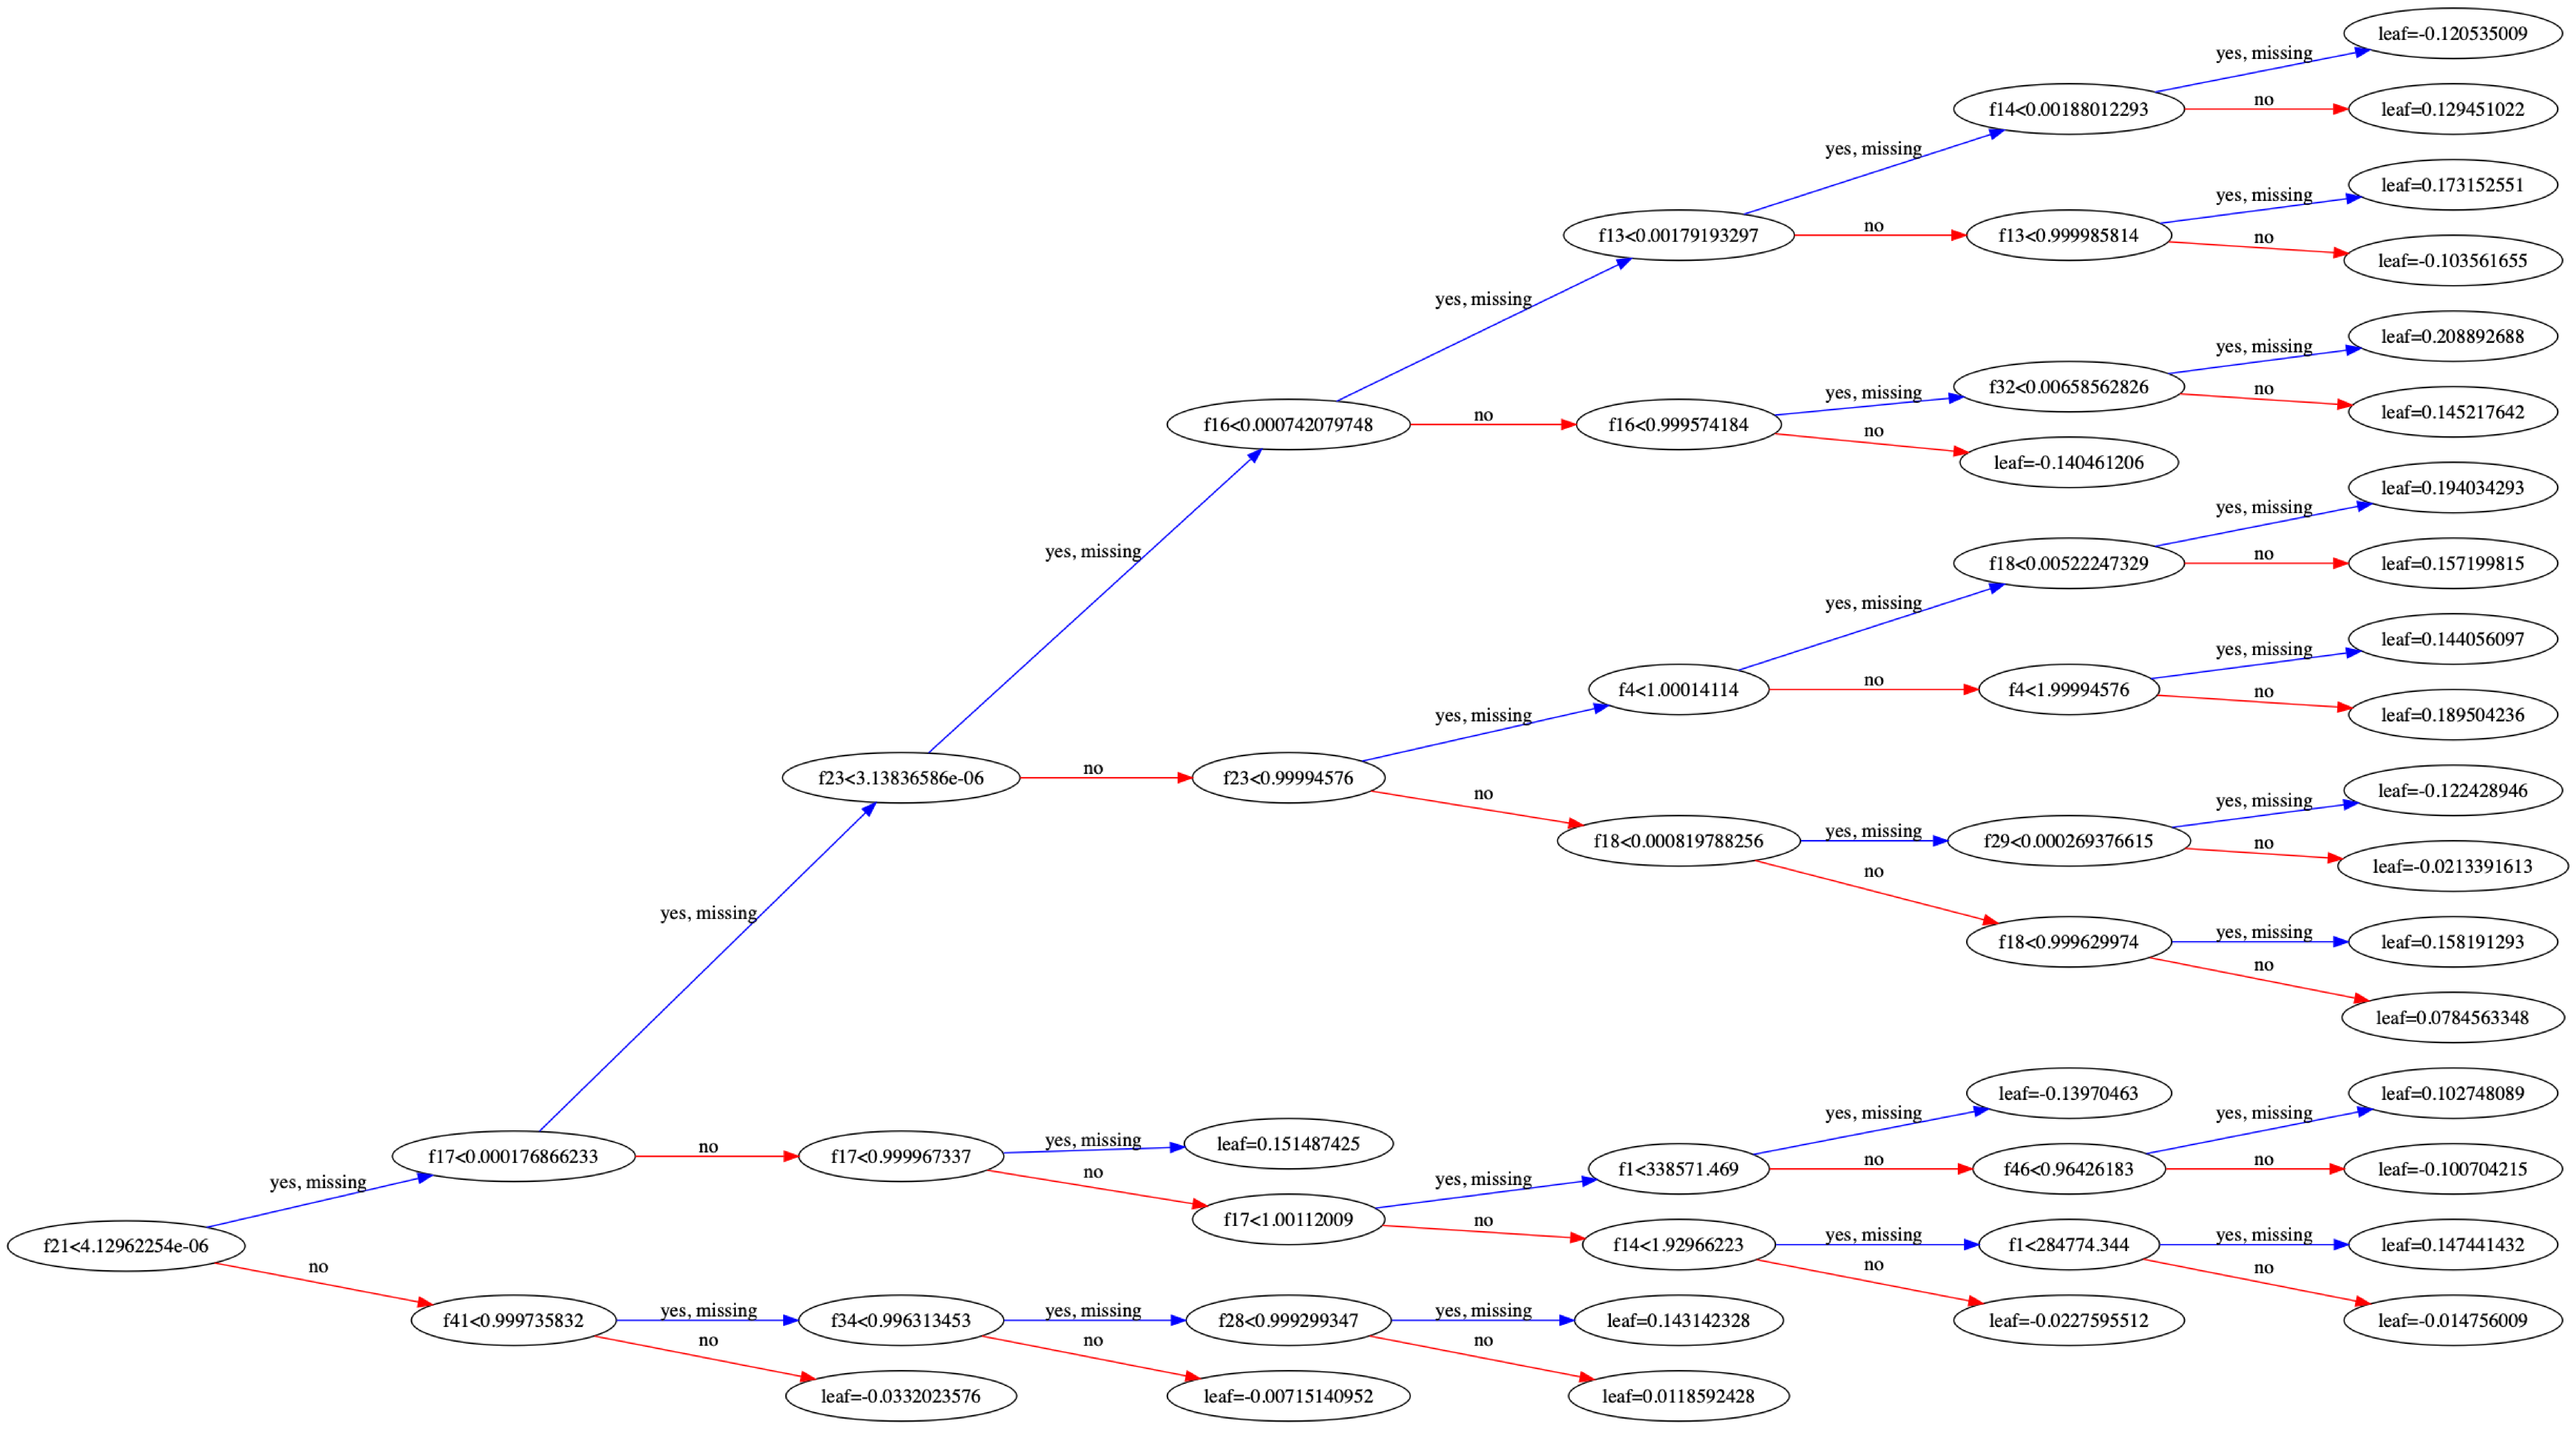

In [120]:
#print 5th boosted tree
plot_tree(xgb_best_smote, num_trees= 5, rankdir='LR')
# plt.savefig("/Users/raghugup/Downloads/xgb_best.png", format='png', dpi=2000)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('/Users/raghugup/Downloads/tree.png')